# Notebook exploration données : job_events

In [63]:
import os, json
import pandas as pd
from azure_blob import download_blob_file
from utilities import string_to_dict
import matplotlib.pyplot as plt
from datetime import datetime

In [64]:
filename = 'metrics.csv'
path = '../data/'

In [65]:
# téléchargement dans le repertoire 'data' d'un fichiers 'csv' depuis le blob
download_blob_file(file_name=filename, local_path=path)
metrics = os.path.join(path, filename)

metrics.csv already in path ../data/.


In [66]:
# création d'un dataframe à partir du csv de données
metrics_df = pd.read_csv(metrics).sort_values(by='created_at')
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164430 entries, 307539 to 1164429
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id                         1164430 non-null  int64  
 1   status                     1164430 non-null  object 
 2   created_at                 1164430 non-null  object 
 3   cyan_capacity              0 non-null        float64
 4   cyan_remaining             0 non-null        float64
 5   magenta_capacity           0 non-null        float64
 6   magenta_remaining          0 non-null        float64
 7   yellow_capacity            0 non-null        float64
 8   yellow_remaining           0 non-null        float64
 9   black_capacity             0 non-null        float64
 10  black_remaining            0 non-null        float64
 11  machineId                  1164430 non-null  int64  
 12  connected_operators        1164430 non-null  object 
 13  varnish

In [67]:
metrics_df.dropna(axis=1, inplace=True)
metrics_df.drop('machineId', axis=1, inplace=True)
# metrics_df.set_index('id')

In [68]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164430 entries, 307539 to 1164429
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id                         1164430 non-null  int64  
 1   status                     1164430 non-null  object 
 2   created_at                 1164430 non-null  object 
 3   connected_operators        1164430 non-null  object 
 4   varnishLevelsTargetvolume  1164430 non-null  float64
 5   varnishLevelsTotalvolume   1164430 non-null  int64  
 6   modules                    1164430 non-null  object 
 7   events                     1164430 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 80.0+ MB


In [69]:
def convert_str_to_list(series):
    return series.apply(lambda x :json.loads(x))

In [70]:
def get_keys(dict):
    return list(k for k in dict.keys() )

In [71]:
def add_key_column(df, dict_col_name, list_keys):
    for k in list_keys:
        df[k] = df.apply(lambda x: x[dict_col_name].get(k), axis=1)
    df.drop(dict_col_name, axis=1, inplace=True)
    return df

In [72]:
def check_list_length(list):
    if len(list) :
        print(len(list))

### connected_operators

In [73]:
#metrics_df.connected_operators = metrics_df.connected_operators.apply(lambda x :json.loads(x)[0])
metrics_df.connected_operators = convert_str_to_list(metrics_df.connected_operators)
list_keys = get_keys(metrics_df.connected_operators)
metrics_df = add_key_column(metrics_df, 'connected_operators', list_keys)

KeyboardInterrupt: 

In [ ]:
metrics_df.head(3)

### modules

In [31]:
metrics_df.modules = convert_str_to_list(metrics_df.modules)
metrics_df['Length'] = metrics_df.modules.map(len)
metrics_df.Length.max(numeric_only=True)

2

In [36]:
metrics_df.id.iloc[metrics_df.Length.max(numeric_only=True)]

4169753

In [49]:
metrics_df.loc[metrics_df.id == 10,:]

,id,status,created_at,varnishLevelsTargetvolume,varnishLevelsTotalvolume,modules,events,name,level,Length,sn_0,name_0,type_0,counters_0,generation_0,sn_1,name_1,type_1,counters_1,generation_1
307539,4169748,WARNING,2022-04-15 05:55:06.678000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
307540,4169749,WARNING,2022-04-15 05:55:06.829000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...","[{""source"": ""PLC"", ""message"": "" JV-Ti non prêt...",None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
307537,4169753,WARNING,2022-04-15 05:55:14.494000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
307541,4169758,WARNING,2022-04-15 05:55:24.503000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
307542,4169763,WARNING,2022-04-15 05:55:34.515000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164426,10909300,IDLE,2022-12-12 08:20:57.846000,89002.696800,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",
1164427,10909304,IDLE,2022-12-12 08:21:08.067000,88999.004996,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",
1164428,10909309,IDLE,2022-12-12 08:21:18.076000,88999.004996,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...","[{""source"": ""PLC"", ""message"": "" En attente"", ""...",None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",
1164424,10909314,IDLE,2022-12-12 08:21:28.092000,88999.004996,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",


In [32]:
list_keys = get_keys(metrics_df.modules[0][0])
print(list_keys)

['sn', 'name', 'type', 'counters', 'generation']


In [33]:
for i in range(0, len(metrics_df.modules[0])) :
    for k in list_keys:
        metrics_df[k+'_'+str(i)] = metrics_df.apply(lambda x: x['modules'][0].get(k), axis=1)

In [35]:
metrics_df

,id,status,created_at,varnishLevelsTargetvolume,varnishLevelsTotalvolume,modules,events,name,level,Length,sn_0,name_0,type_0,counters_0,generation_0,sn_1,name_1,type_1,counters_1,generation_1
307539,4169748,WARNING,2022-04-15 05:55:06.678000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
307540,4169749,WARNING,2022-04-15 05:55:06.829000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...","[{""source"": ""PLC"", ""message"": "" JV-Ti non prêt...",None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
307537,4169753,WARNING,2022-04-15 05:55:14.494000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
307541,4169758,WARNING,2022-04-15 05:55:24.503000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
307542,4169763,WARNING,2022-04-15 05:55:34.515000,36192.322612,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 17929...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164426,10909300,IDLE,2022-12-12 08:20:57.846000,89002.696800,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",
1164427,10909304,IDLE,2022-12-12 08:21:08.067000,88999.004996,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",
1164428,10909309,IDLE,2022-12-12 08:21:18.076000,88999.004996,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...","[{""source"": ""PLC"", ""message"": "" En attente"", ""...",None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",
1164424,10909314,IDLE,2022-12-12 08:21:28.092000,88999.004996,100000,"[{'sn': '', 'name': 'Print Engine 1', 'type': ...",[],None,None,2,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",,,Print Engine 1,Varnish Printer,"[{'name': '3D Varnish Counter', 'value': 25470...",


In [34]:
modules_df = metrics_df['modules'].apply(pd.Series, dtype='object')

### events column

In [141]:
# convertion de "events" en type list
metrics_df.events = metrics_df.events.apply(lambda x :json.loads(x))

In [150]:
# eclatement des listes des events dans un dataframe
events_df = pd.DataFrame(metrics_df.events.to_list(), dtype=object)

In [152]:
# renommage des colonnes du dataframe des events
i = 0
col_names = {}
for col in range(events_df.columns.start, events_df.columns.stop):
    col_names[col] = 'e'+str(col)
events_df.rename(columns=col_names, inplace=True)

In [158]:
events_df.fillna({}, inplace=True)

In [ ]:
for col in events_df.columns :
    for event in events_df[col].values :
        if not isinstance(event, dict) :
            event = {}

In [129]:
# on liste les index des lignes qui ont 1 et plus de 1 event
single_event_indexes = []
multiple_events_indexes = []
for index, value in metrics_df.events.items() :
    if len(value) == 1 :
        single_event_indexes.append(index)
    if len(value) > 1 :
        multiple_events_indexes.append(index)

In [156]:
metrics = metrics_df['events'].apply(pd.Series, dtype='object')

In [ ]:
metrics_events_df = metrics_df[metrics_df['events'].map(lambda d: len(d)) > 0]

In [ ]:
events_df = pd.DataFrame(metrics_events_df.events.to_list())

In [ ]:
events_df = pd.DataFrame(metrics_events_df)
events_df[['source','message','timestamp','criticality','identification']] = pd.DataFrame(events_df.events.tolist(), index= events_df.index)

In [ ]:
# e = []
# for m in metrics_df.events.values :
#     if len(m) > 0 :
#         e.append(m)
# len(e)

In [ ]:
#metrics = metrics_df['events'].apply(pd.Series, dtype='object')

In [ ]:
metrics_df

In [ ]:
metrics_df.columns

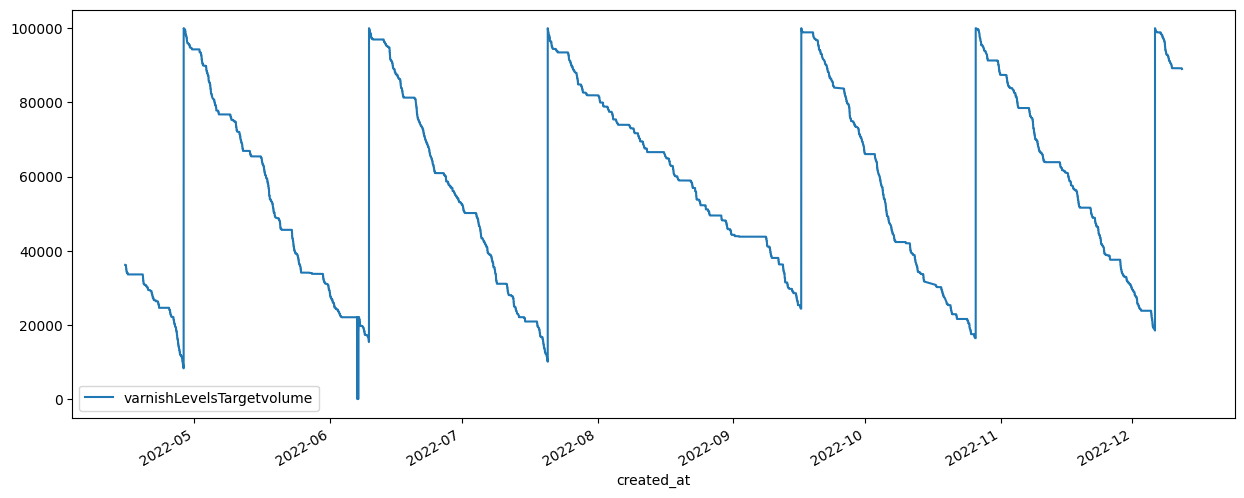

In [163]:
df = metrics_df.loc[:, ['created_at', 'varnishLevelsTargetvolume']]
# Set the Date as Index
df.created_at = pd.to_datetime(df.created_at)
df.index = df['created_at']
del df['created_at']
df.plot(figsize=(15, 6))
plt.show()